---

# Predicting Financial Distress with a Neural Network

In this notebook, we will train a neural network classifier to predict whether an individual is likely to experience serious financial distress within the next two years, using the Give Me Some Credit dataset. Neural networks are universal function approximators that excel at modeling complex, nonlinear relationships between inputs and outputs.

Compared to linear models like logistic regression, neural networks can learn interactions between features implicitly, making them especially powerful for structured data problems with hidden dependencies. We will build a multi-layer perceptron (MLP) using scikit-learn's MLPClassifier to classify individuals based on their financial indicators.

The dataset contains anonymized features such as revolving credit utilization, debt ratio, income, and number of past delinquencies. The target is a binary indicator of whether the individual became seriously delinquent within the next two years.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve


---

Import the data.

---

In [3]:
df = pd.read_csv("data/cs-training.csv", index_col=0)
df.rename(columns={"SeriousDlqin2yrs": "Distress"}, inplace=True)
df.dropna(inplace=True)
df

,Distress,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


---

Separate the features and target and normalize the data.

---

In [4]:
# Features and target
X = df.drop(columns="Distress")
y = df["Distress"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

---

Separate the training and testing sets.

---

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

---

Train the neural network using layer sizes of 64 and 32 and a small learning rate.

---

In [6]:
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',
                      solver='adam', alpha=0.0001, max_iter=100, random_state=42)

model.fit(X_train, y_train)

c:\Users\kylej\OneDrive\Documents\Schoolwork\Years\Junior\Spring\INDE 577\Sanderfer-CMOR-438-Spring-2025\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

---

Time to test our model! We can print the confusion matrix here.

---

Accuracy: 93.21%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     22383
           1       0.53      0.18      0.26      1671

    accuracy                           0.93     24054
   macro avg       0.74      0.58      0.61     24054
weighted avg       0.91      0.93      0.92     24054



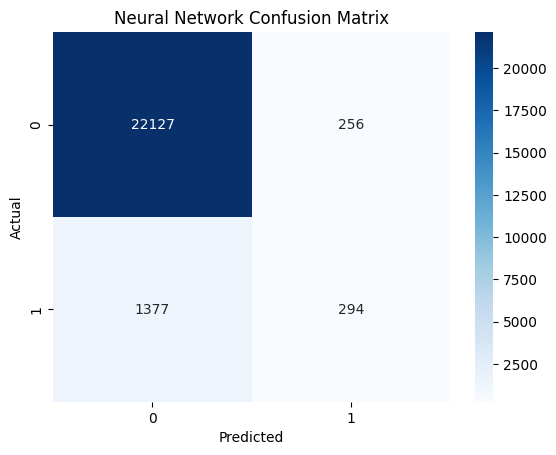

In [7]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Neural Network Confusion Matrix")
plt.show()

---

The overall accuracy appears to be about the same as the logistic regression model, with the same misclassification rate. However, this number isn't everything and we can also graph the area under the ROC curve to more fully see the model's performance.

---

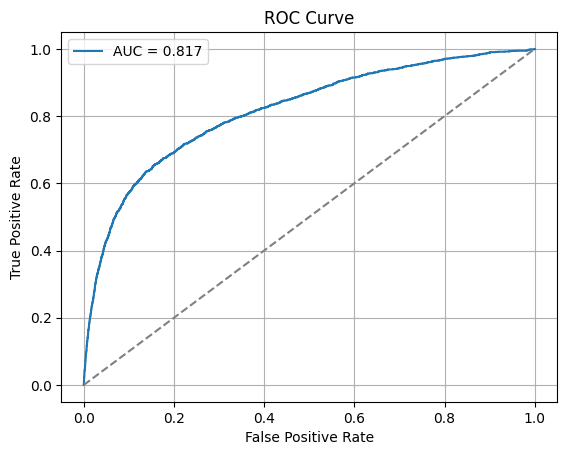

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

---

We can see that the model actually performed substantially better in this regard compared to logistic regression: about 0.81 compared to 0.68! This indicates the the layers of rebalancing that are used in a neural network was better able to parse this complex and dense dataset, which bodes well for the approach overall.

---